# Getting Basic Data

In [1]:
topical_bible_path = "/home/jose/Dropbox/biblia/datos/topical bible/topic-scores.txt"

In [2]:
import pandas as pd
import re
import sys
import os
sys.path.append(os.path.abspath("/home/jose/Dropbox/Doktorarbeit/"))
from reading_robot import load_data, tei2text, text2features, classify, process_labels, describe_data, feature_analysis, cull_data, st_tests, metadata2numbers, cluster, call_stylo, prepare_subcorpus, genre_as_graph


/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [3]:
books_df = pd.ExcelFile("/home/jose/Dropbox/biblia/tb/documentation/books.xlsx",  index_col=0).parse('Sheet1').fillna("")
books_df = books_df.loc[books_df["codebook"] != ""]
books_df.index = books_df["codebook"]

books_df

,bible,id,libro,testament,encoded,english,codebook,Chaptersc,genre,latitude,longitude,topical bible
codebook,,,,,,,,,,,,
GEN,bible,1,Génesis,old,1,Genesis,GEN,50.0,historical,32.6157,36.7931,Gen
EXO,bible,2,Éxodo,old,1,Exodus,EXO,40.0,historical,30.47,33.8433,Exod
LEV,bible,3,Levítico,old,1,Leviticus,LEV,27.0,law,30.5218,34.1126,Lev
NUM,bible,4,Números,old,1,Numbers,NUM,36.0,law,31.2216,34.8414,Num
DEU,bible,5,Deuteronomio,old,1,Deuteronomy,DEU,34.0,law,31.5061,35.7352,Deut
JOS,bible,6,Josué,old,1,Joshua,JOS,24.0,historical,31.7041,34.9904,Josh
JDG,bible,7,Jueces,old,1,Judges,JDG,21.0,historical,31.7296,35.4679,Judg
RUT,bible,8,Rut,old,1,Ruth,RUT,4.0,historical,29.8573,33.6189,Ruth
1SA,bible,9,1 Samuel,old,1,1 Samuel,1SA,31.0,historical,31.598,35.0462,1Sam


In [4]:
quantitative_features_df = pd.read_csv("/home/jose/Dropbox/biblia/tb/resulting data/quantitative_data.csv", sep="\t", index_col=0).sort_index()

In [5]:
genres_lt = sorted(list(set(books_df["genre"])))

In [6]:
books_genre_boolean_df = pd.get_dummies(books_df["genre"])

In [7]:
books_genre_boolean_df

,apocalyptic,gospel,historical,law,letter,lyric,prophecy,wisdom
codebook,,,,,,,,
GEN,0,0,1,0,0,0,0,0
EXO,0,0,1,0,0,0,0,0
LEV,0,0,0,1,0,0,0,0
NUM,0,0,0,1,0,0,0,0
DEU,0,0,0,1,0,0,0,0
JOS,0,0,1,0,0,0,0,0
JDG,0,0,1,0,0,0,0,0
RUT,0,0,1,0,0,0,0,0
1SA,0,0,1,0,0,0,0,0


In [8]:
topics_books_df = pd.read_csv("/home/jose/Dropbox/biblia/datos/topical bible/topics_books_df.csv", sep="\t", index_col=0)

In [9]:
topics_books_df.shape

(66, 5998)

In [10]:
books_genre_boolean_df.sort_index(inplace=True)

In [11]:
books_genre_boolean_df.to_csv("/home/jose/Dropbox/Doktorarbeit/publications/202006_DH/data/bible/labels.csv", sep = "\t")

# Cleaning Features

In [12]:
topics_books_df

,10 commandments,2012,2nd marriage,4th of july,666,7 deadly sins,a healthy marriage,a husband,a man,a man working,...,your thoughts,youth,youths,zeal,ziggurats,zion,zionism,zodiac signs,zombies,zoroastrian priests
codebook,,,,,,,,,,,,,,,,,,,,,
1CH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1CO,0.0,0.0,6.0,0.0,0.0,0.0,11.0,11.0,2.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
1JO,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1KI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1PE,0.0,0.0,0.0,21.0,0.0,0.0,4.0,9.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,4.0
1SA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1TH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1TI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,8.0,...,0.0,11.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2CH,0.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
quantitative_features_df["most common entity id"].dtype

dtype('O')

In [14]:
categorical_quantitatives_features_df = quantitative_features_df.copy()
for column in quantitative_features_df.select_dtypes(["number"]).columns.tolist():
    del categorical_quantitatives_features_df[column]

del categorical_quantitatives_features_df["genre"]
del categorical_quantitatives_features_df["id"]
del categorical_quantitatives_features_df["title"]
del categorical_quantitatives_features_df["viaf"]

categorical_quantitatives_features_df = pd.get_dummies(categorical_quantitatives_features_df)
categorical_quantitatives_features_df.head()

,most common entity id_#org0,most common entity id_#org126,most common entity id_#org171,most common entity id_#org18,most common entity id_#org19,most common entity id_#org70,most common entity id_#per1,most common entity id_#per14,most common entity id_#per1876,most common entity id_#per35,...,most frequent entity id times_#tim9,most frequent entity id works_#wor1,most frequent entity id works_#wor10,most frequent entity id works_#wor13,most frequent entity id works_#wor15,most frequent entity id works_#wor16,most frequent entity id works_#wor4,most frequent entity id works_#wor7,most frequent entity id works_#wor8,most frequent entity id works_#wor9
1CO,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1JO,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1KI,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1PE,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1SA,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [15]:
quantitative_features_df.iloc[:,5:10]# 5:10-11:12-13:48-53:

numerical_quantitative_features_df = quantitative_features_df.select_dtypes(['number'])



In [16]:
quantitative_features_df = pd.concat([numerical_quantitative_features_df,categorical_quantitatives_features_df], axis="columns")


In [17]:
quantitative_features_df.head()

,n,verses,number verses,number chapters,number pericopes,number of quotations,mean number quotations,median number quotations,std of number ofquotations,1st perc of number of quotations,...,most frequent entity id times_#tim9,most frequent entity id works_#wor1,most frequent entity id works_#wor10,most frequent entity id works_#wor13,most frequent entity id works_#wor15,most frequent entity id works_#wor16,most frequent entity id works_#wor4,most frequent entity id works_#wor7,most frequent entity id works_#wor8,most frequent entity id works_#wor9
1CO,44,437,437,16,29,437,0.068650,0.0,0.338441,0,...,0,1,0,0,0,0,0,0,0,0
1JO,60,105,105,5,11,105,0.028571,0.0,0.167398,0,...,0,1,0,0,0,0,0,0,0,0
1KI,11,816,816,22,51,816,0.604167,0.0,0.787281,0,...,0,0,0,1,0,0,0,0,0,0
1PE,58,105,105,5,14,105,0.076190,0.0,0.266575,0,...,0,1,0,0,0,0,0,0,0,0
1SA,9,810,810,31,36,810,0.728395,1.0,0.717301,0,...,0,1,0,0,0,0,0,0,0,0


In [18]:
rel_quantitative_features_df  = quantitative_features_df.copy()

In [19]:
for column in rel_quantitative_features_df.columns.tolist():
    rel_quantitative_features_df[column] = rel_quantitative_features_df[column] / rel_quantitative_features_df["verses"]   

In [20]:
del rel_quantitative_features_df["works"]


In [21]:
rel_quantitative_features_df.shape

(64, 160)

In [22]:
rel_quantitative_features_df = rel_quantitative_features_df.fillna(0)

In [23]:
rel_topics_books_df = topics_books_df.loc[:].div(books_df["Chaptersc"], axis="index")
rel_topics_books_df.head()

,10 commandments,2012,2nd marriage,4th of july,666,7 deadly sins,a healthy marriage,a husband,a man,a man working,...,your thoughts,youth,youths,zeal,ziggurats,zion,zionism,zodiac signs,zombies,zoroastrian priests
codebook,,,,,,,,,,,,,,,,,,,,,
1CH,0.0,0.0,0.000,0.0,0.0,0.0,0.0000,0.0000,0.000,0.0,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0
1CO,0.0,0.0,0.375,0.0,0.0,0.0,0.6875,0.6875,0.125,0.0,...,0.0,0.1875,0.0,0.0,0.0,0.0,0.0,0.0,0.1875,0.0
1JO,0.0,0.0,0.000,0.0,0.0,2.0,0.0000,0.0000,0.000,0.8,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0
1KI,0.0,0.0,0.000,0.0,0.0,0.0,0.0000,0.0000,0.000,0.0,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0
1PE,0.0,0.0,0.000,4.2,0.0,0.0,0.8000,1.8000,0.000,0.0,...,0.0,0.0000,0.0,0.0,0.0,0.0,1.6,0.0,0.0000,0.8


In [24]:
try:
    del rel_topics_books_df["people"]
    del rel_topics_books_df["groups"]
    del rel_topics_books_df["places"]
    del rel_topics_books_df["works"]
except:
    pass

In [25]:
#rel_features_books_df = pd.concat([rel_quantitative_features_df, rel_topics_books_df], axis="columns").fillna(0)

In [26]:
rel_features_books_df = pd.concat([rel_quantitative_features_df], axis="columns")

In [27]:
rel_features_books_df

,n,verses,number verses,number chapters,number pericopes,number of quotations,mean number quotations,median number quotations,std of number ofquotations,1st perc of number of quotations,...,most frequent entity id times_#tim9,most frequent entity id works_#wor1,most frequent entity id works_#wor10,most frequent entity id works_#wor13,most frequent entity id works_#wor15,most frequent entity id works_#wor16,most frequent entity id works_#wor4,most frequent entity id works_#wor7,most frequent entity id works_#wor8,most frequent entity id works_#wor9
1CO,0.100686,1.0,437.0,16.0,29.0,437.0,0.068650,0.0,0.338441,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1JO,0.571429,1.0,105.0,5.0,11.0,105.0,0.028571,0.0,0.167398,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1KI,0.013480,1.0,816.0,22.0,51.0,816.0,0.604167,0.0,0.787281,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1PE,0.552381,1.0,105.0,5.0,14.0,105.0,0.076190,0.0,0.266575,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1SA,0.011111,1.0,810.0,31.0,36.0,810.0,0.728395,1.0,0.717301,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1TH,0.561798,1.0,89.0,5.0,9.0,89.0,0.011236,0.0,0.106000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1TI,0.460177,1.0,113.0,6.0,14.0,113.0,0.026549,0.0,0.209599,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2CO,0.175097,1.0,257.0,13.0,26.0,257.0,0.042802,0.0,0.254101,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2JO,4.692308,1.0,13.0,1.0,3.0,13.0,0.153846,0.0,0.375534,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2KI,0.016713,1.0,718.0,25.0,61.0,718.0,0.683844,0.0,0.927822,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
rel_features_books_df = rel_features_books_df.reindex_axis(rel_features_books_df.mean().sort_values(ascending=False).index, axis=1)

In [29]:
rel_features_books_df.to_csv("/home/jose/Dropbox/Doktorarbeit/publications/202006_DH/data/bible/rel_features.csv",sep="\t")

In [30]:
zscores_rel_features_books_df = text2features.calculate_zscore(rel_features_books_df).fillna(0)
zscores_rel_features_books_df.head()

,number of entities referred,people,number of entities receiving communication,number verses,number of references,number of quotations,number of entities communicating,groups,number of oral quotations,number of 1st level quotations,...,most frequent entity id people_#per504,most frequent entity id people_#per843,most frequent entity id people_#per861,most frequent entity id people_#per93,most frequent entity id people_#per969,most frequent entity id groups_#org100,most frequent entity id groups_#org101,most frequent entity id groups_#org12,most frequent entity id groups_#org122,1st perc of number of references
1CO,-0.303435,-0.277165,-0.642070,-0.009785,-0.009785,-0.009785,-0.651778,-0.031970,-0.679790,-0.643289,...,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,7.875,0.0
1JO,-0.656798,-0.545792,-0.667658,-0.671920,-0.671920,-0.671920,-0.673785,-0.634761,-0.682124,-0.708125,...,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,0.0
1KI,1.520667,1.842879,0.149675,0.746086,0.746086,0.746086,0.164148,0.560208,0.232723,0.326649,...,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,0.0
1PE,-0.703039,-0.619533,-0.663143,-0.671920,-0.671920,-0.671920,-0.668706,-0.647496,-0.679790,-0.695157,...,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,0.0
1SA,1.591064,2.010112,0.242999,0.734120,0.734120,0.734120,0.323271,0.965606,0.554786,0.668980,...,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,0.0


In [31]:
results_features_df = genre_as_graph.results_features(books_genre_boolean_df, list(set(books_df["genre"])), zscores_rel_features_books_df)
results_features_df.head(20)

,number of entities referred,people,number of entities receiving communication,number verses,number of references,number of quotations,number of entities communicating,groups,number of oral quotations,number of 1st level quotations,...,most frequent entity id people_#per504,most frequent entity id people_#per843,most frequent entity id people_#per861,most frequent entity id people_#per93,most frequent entity id people_#per969,most frequent entity id groups_#org100,most frequent entity id groups_#org101,most frequent entity id groups_#org12,most frequent entity id groups_#org122,1st perc of number of references
apocalyptic,0.589292,0.214000,0.546300,0.809906,0.809906,0.809906,0.682143,0.930585,0.853511,0.864783,...,-0.125,-0.125000,-0.125000,-0.125000,-0.125000,-0.125000,-0.125000,-0.125000,-0.125000,0.0
lyric,0.107443,0.049839,0.403054,0.935552,0.935552,0.935552,0.527534,0.275793,-0.179580,1.016498,...,-0.125,-0.125000,-0.125000,-0.125000,-0.125000,-0.125000,-0.125000,-0.125000,-0.125000,0.0
prophecy,-0.234270,-0.333599,0.243321,-0.312076,-0.312076,-0.312076,0.264023,-0.125512,0.313239,-0.079036,...,-0.125,-0.125000,0.446429,-0.125000,-0.125000,0.446429,0.446429,-0.125000,-0.125000,0.0
wisdom,-0.287101,-0.465906,0.715637,0.585871,0.585871,0.585871,0.298443,0.315413,0.193048,0.638724,...,-0.125,-0.125000,-0.125000,-0.125000,-0.125000,-0.125000,-0.125000,-0.125000,-0.125000,0.0
gospel,0.164358,0.283000,0.366427,0.621238,0.621238,0.621238,0.306343,-0.007774,0.494108,0.611925,...,1.475,-0.125000,-0.125000,-0.125000,-0.125000,-0.125000,-0.125000,-0.125000,-0.125000,0.0
historical,0.915341,1.085720,-0.018446,0.353193,0.353193,0.353193,0.016615,0.385836,0.071691,0.133539,...,-0.125,-0.125000,-0.125000,0.490385,0.490385,-0.125000,-0.125000,-0.125000,-0.125000,0.0
letter,-0.670141,-0.585672,-0.659201,-0.622060,-0.622060,-0.622060,-0.665159,-0.620914,-0.676011,-0.689230,...,-0.125,0.255952,-0.125000,-0.125000,-0.125000,-0.125000,-0.125000,-0.125000,0.255952,0.0
law,1.330642,0.753448,1.465236,1.183521,1.183521,1.183521,1.560703,2.061524,1.553649,1.363152,...,-0.125,-0.125000,-0.125000,-0.125000,-0.125000,-0.125000,-0.125000,2.541667,-0.125000,0.0


In [32]:
zscores_rel_features_books_df.to_csv("/home/jose/Dropbox/Doktorarbeit/publications/202006_DH/data/bible/features.csv",sep="\t")

# Classify

In [33]:
books_genre_boolean_df = books_genre_boolean_df.loc[rel_features_books_df.index.tolist()]

In [34]:
rel_features_books_df.index.tolist() == books_genre_boolean_df.index.tolist()

True

In [35]:
wdir = "/home/jose/Dropbox/Doktorarbeit/publications/202006_DH/data/bible/"

In [75]:
classification_results_bible_df = classify.classify(wdir, freq_table  = rel_features_books_df, metadata = books_genre_boolean_df,
             sep = "\t", classes = books_genre_boolean_df.columns.tolist(), verbose = True, methods = ["SVC","LR"], min_MFF = 0,
             max_MFFs = [30,100,160], text_representations = ["log","raw"], typographies = [True],
             sampling_mode = "cross", 
             minimal_value_samples = 2, make_relative = False,
             under_sample_method = "lpc", maximum_cases = 5000, sampling_times = 3, outdir_results = "",
             )

cut_raw_features       number of entities referred  people  \
1CO                        768.0   367.0   
1JO                        256.0   163.0   
1KI                       3411.0  1977.0   
1PE                        189.0   107.0   
1SA                       3513.0  2104.0   

     number of entities receiving communication  number verses  \
1CO                                        20.0          437.0   
1JO                                         3.0          105.0   
1KI                                       546.0          816.0   
1PE                                         6.0          105.0   
1SA                                       608.0          810.0   

     number of references  number of quotations  \
1CO                 437.0                 437.0   
1JO                 105.0                 105.0   
1KI                 816.0                 816.0   
1PE                 105.0                 105.0   
1SA                 810.0                 810.0   

     number o

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


result of comparing cross-validation to baseline Ttest_1sampResult(statistic=1.1180339887498945, pvalue=0.314372637647017)
Class: 	 apocalyptic
Scores:
 	 f1          0.833
rec         1.000
prec        0.750
f1_macro    0.667
f1_micro    0.750
dtype: float64
p-value:  0.3144
Baseline: 		 0.5
LR
0.33299999999999996
MFW 100
The three first MFWs:  ['number of entities referred', 'people', 'number verses']
The three last MFWs:  ['most frequent entity id times_#tim27', 'second most common entity id_#per1727', 'most frequent entity id works_#wor8']
method used:	 SVC
(64,)
(64, 99)
undersampling lpc
undersampled (4,) (4, 99) lpc
cross validation sampling of  apocalyptic
(64,)
(64, 99)
undersampling lpc
undersampled (4,) (4, 99) lpc
cross validation sampling of  apocalyptic
(64,)
(64, 99)
undersampling lpc
undersampled (4,) (4, 97) lpc
cross validation sampling of  apocalyptic
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-1.2285902336679024, pvalue=0.2738937828

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


(64,)
(64, 30)
undersampling lpc
undersampled (10,) (10, 30) lpc
cross validation sampling of  gospel
(64,)
(64, 30)
undersampling lpc
undersampled (10,) (10, 30) lpc
cross validation sampling of  gospel
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=8.401388774085705, pvalue=7.7103773596415e-07)
Class: 	 gospel
Scores:
 	 f1          0.8
rec         1.0
prec        0.7
f1_macro    0.6
f1_micro    0.7
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.30000000000000004
MFW 100
The three first MFWs:  ['number of entities referred', 'people', 'number verses']
The three last MFWs:  ['most frequent entity id times_#tim27', 'second most common entity id_#per1727', 'most frequent entity id works_#wor8']
method used:	 SVC
(64,)
(64, 99)
undersampling lpc
undersampled (10,) (10, 99) lpc
cross validation sampling of  gospel
(64,)
(64, 99)
undersampling lpc
undersampled (10,) (10, 99) lpc
cross validation sampling of  gospel
(64,)
(64, 99)
undersampling lpc
undersam

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


result of comparing cross-validation to baseline Ttest_1sampResult(statistic=5.071553745975206, pvalue=2.0790869733931853e-05)
Class: 	 historical
Scores:
 	 f1          0.713
rec         0.800
prec        0.667
f1_macro    0.707
f1_micro    0.775
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.21299999999999997
method used:	 LR
(64,)
(64, 30)
undersampling lpc
undersampled (26,) (26, 30) lpc
cross validation sampling of  historical
(64,)
(64, 30)
undersampling lpc
undersampled (26,) (26, 30) lpc
cross validation sampling of  historical
(64,)
(64, 30)
undersampling lpc
undersampled (26,) (26, 30) lpc
cross validation sampling of  historical
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=5.402981477499796, pvalue=8.279869453425663e-06)
Class: 	 historical
Scores:
 	 f1          0.783
rec         0.850
prec        0.800
f1_macro    0.697
f1_micro    0.750
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.28300000000000003
MFW 100
The three first MFWs:  

(64,)
(64, 159)
undersampling lpc
undersampled (26,) (26, 115) lpc
cross validation sampling of  historical
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=4.835767273973063, pvalue=4.0036721751976145e-05)
Class: 	 historical
Scores:
 	 f1          0.833
rec         0.800
prec        0.900
f1_macro    0.880
f1_micro    0.900
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.33299999999999996


analysed class:	 law
* Culling data
labels done
Counter({'0': 61, '1': 3})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(64,)
(64, 160)
Counter({'0': 61, '1': 3})
(64, 160) (64,)
Least popupated class value:	  3
Labels shape (64,) 
 Data shape (64, 159)
size after culling data: (64, 159) (64,)
typography  True
textual representation:  log
Columns that are empty:  []
(64, 159)
MFW 30
The three first MFWs:  ['number of enti

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


result of comparing cross-validation to baseline Ttest_1sampResult(statistic=3.1235807588017876, pvalue=0.014151882766696627)
Class: 	 law
Scores:
 	 f1          0.667
rec         0.667
prec        0.667
f1_macro    0.667
f1_micro    0.667
dtype: float64
p-value:  0.0142
Baseline: 		 0.5
LR
0.16700000000000004
MFW 100
The three first MFWs:  ['number of entities referred', 'people', 'number verses']
The three last MFWs:  ['most frequent entity id times_#tim27', 'second most common entity id_#per1727', 'most frequent entity id works_#wor8']
method used:	 SVC
(64,)
(64, 99)
undersampling lpc
undersampled (6,) (6, 99) lpc
cross validation sampling of  law
(64,)
(64, 99)
undersampling lpc
undersampled (6,) (6, 98) lpc
cross validation sampling of  law
(64,)
(64, 99)
undersampling lpc
undersampled (6,) (6, 98) lpc
cross validation sampling of  law
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-0.11704114719613072, pvalue=0.9097124492264894)
Class: 	 law
Scores:

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


result of comparing cross-validation to baseline Ttest_1sampResult(statistic=8.139112983769554, pvalue=5.64218748557705e-09)
Class: 	 letter
Scores:
 	 f1          0.84
rec         0.90
prec        0.80
f1_macro    0.84
f1_micro    0.85
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.33999999999999997
method used:	 LR
(64,)
(64, 30)
undersampling lpc
undersampled (42,) (42, 30) lpc
cross validation sampling of  letter
(64,)
(64, 30)
undersampling lpc
undersampled (42,) (42, 30) lpc
cross validation sampling of  letter
(64,)
(64, 30)
undersampling lpc
undersampled (42,) (42, 30) lpc
cross validation sampling of  letter
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=24.85132256790282, pvalue=4.236182315555981e-21)
Class: 	 letter
Scores:
 	 f1          0.912
rec         0.950
prec        0.908
f1_macro    0.903
f1_micro    0.908
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.41200000000000003
MFW 100
The three first MFWs:  ['number of entities referr

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-1.3438638879193578, pvalue=0.21585838586568937)
Class: 	 lyric
Scores:
 	 f1          0.222
rec         0.333
prec        0.167
f1_macro    0.333
f1_micro    0.500
dtype: float64
p-value:  0.2159
Baseline: 		 0.5
LR
-0.278
MFW 100
The three first MFWs:  ['number of entities referred', 'people', 'number verses']
The three last MFWs:  ['most frequent entity id times_#tim27', 'second most common entity id_#per1727', 'most frequent entity id works_#wor8']
method used:	 SVC
(64,)
(64, 99)
undersampling lpc
undersampled (6,) (6, 99) lpc
cross validation sampling of  lyric
(64,)
(64, 99)
undersampling lpc
undersampled (6,) (6, 99) lpc
cross validation sampling of  lyric
(64,)
(64, 99)
undersampling lpc
undersampled (6,) (6, 99) lpc
cross validation sampling of  lyric
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.9999999999999993, pvalue=0.3465935070873345)
Class: 	 lyric
Scores:
 	 f

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


(64,)
(64, 30)
undersampling lpc
undersampled (28,) (28, 30) lpc
cross validation sampling of  prophecy
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=7.471994018849522, pvalue=3.101538260210925e-08)
Class: 	 prophecy
Scores:
 	 f1          0.860
rec         0.900
prec        0.833
f1_macro    0.880
f1_micro    0.900
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.36
method used:	 LR
(64,)
(64, 30)
undersampling lpc
undersampled (28,) (28, 30) lpc
cross validation sampling of  prophecy
(64,)
(64, 30)
undersampling lpc
undersampled (28,) (28, 30) lpc
cross validation sampling of  prophecy
(64,)
(64, 30)
undersampling lpc
undersampled (28,) (28, 30) lpc
cross validation sampling of  prophecy
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=10.224876166324453, pvalue=3.9753445873594347e-11)
Class: 	 prophecy
Scores:
 	 f1          0.860
rec         0.900
prec        0.833
f1_macro    0.880
f1_micro    0.900
dtype: float64
p-val

(64,)
(64, 159)
undersampling lpc
undersampled (28,) (28, 121) lpc
cross validation sampling of  prophecy
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=8.957641931379007, pvalue=7.539365913452653e-10)
Class: 	 prophecy
Scores:
 	 f1          0.820
rec         0.850
prec        0.800
f1_macro    0.827
f1_micro    0.850
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.31999999999999995


analysed class:	 wisdom
* Culling data
labels done
Counter({'0': 61, '1': 3})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  []
(64,)
(64, 160)
Counter({'0': 61, '1': 3})
(64, 160) (64,)
Least popupated class value:	  3
Labels shape (64,) 
 Data shape (64, 159)
size after culling data: (64, 159) (64,)
typography  True
textual representation:  log
Columns that are empty:  []
(64, 159)
MFW 30
The three first MFWs:  ['number of entiti

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


(64,)
(64, 30)
undersampling lpc
undersampled (6,) (6, 30) lpc
cross validation sampling of  wisdom
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.11043152607484637, pvalue=0.9147872755165956)
Class: 	 wisdom
Scores:
 	 f1          0.889
rec         1.000
prec        0.833
f1_macro    0.778
f1_micro    0.833
dtype: float64
p-value:  0.9148
Baseline: 		 0.5
LR
0.389
MFW 100
The three first MFWs:  ['number of entities referred', 'people', 'number verses']
The three last MFWs:  ['most frequent entity id times_#tim27', 'second most common entity id_#per1727', 'most frequent entity id works_#wor8']
method used:	 SVC
(64,)
(64, 99)
undersampling lpc
undersampled (6,) (6, 98) lpc
cross validation sampling of  wisdom
(64,)
(64, 99)
undersampling lpc
undersampled (6,) (6, 99) lpc
cross validation sampling of  wisdom
(64,)
(64, 99)
undersampling lpc
undersampled (6,) (6, 99) lpc
cross validation sampling of  wisdom
result of comparing cross-validation to baseline 

done!


In [153]:
classification_results_bible_df.head()

,class,mean_f1,mean_rec,mean_prec,f1_macro,f1_micro,baseline,f1-baseline,classifier_name,text_representation,MFW,typography,f1s,test_result_pvalue,labels,sample_size,cv,sampling_times,classifier
84,wisdom,1.000,1.0,1.000,1.000,1.000,0.5,0.500,SVC,log,30,True,"[0.0, 0.67, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0]",4.451989e-01,codebook 1KI 0 JOB 1 HEB 0 COL 0 E...,6,3,3,"SVC(C=1.0, cache_size=200, class_weight=None, ..."
5,apocalyptic,1.000,1.0,1.000,1.000,1.000,0.5,0.500,LR,log,160,True,"[0.0, 0.67, 1.0, 1.0, 1.0, 1.0]",1.527049e-01,codebook EST 0 MAL 0 ISA 1 REV 1 N...,4,2,3,"LogisticRegression(C=1.0, class_weight=None, d..."
46,law,1.000,1.0,1.000,1.000,1.000,0.5,0.500,SVC,raw,160,True,"[0.67, 1.0, 0.67, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",2.389645e-05,codebook ECC 0 LEV 1 MAL 0 NUM 1 D...,6,3,3,"SVC(C=1.0, cache_size=200, class_weight=None, ..."
53,letter,0.986,1.0,0.975,0.983,0.983,0.5,0.486,LR,log,160,True,"[0.86, 0.67, 0.67, 1.0, 1.0, 1.0, 1.0, 1.0, 1....",5.380543e-22,codebook 1TH 1 1CO 1 JOS 0 2TI 1 J...,42,10,3,"LogisticRegression(C=1.0, class_weight=None, d..."
54,letter,0.980,1.0,0.967,0.973,0.975,0.5,0.480,SVC,raw,30,True,"[0.5, 1.0, 1.0, 1.0, 1.0, 0.8, 1.0, 0.8, 1.0, ...",4.197082e-18,codebook JUD 1 REV 0 1CO 1 HEB 1 L...,42,10,3,"SVC(C=1.0, cache_size=200, class_weight=None, ..."


In [36]:
classification_results_bible_df = pd.read_csv(wdir + "results_apocalyptic-gospel-historical-law-letter-lyric-prophecy-wisdom_SVC-LR_30-100-160_log-raw.csv", sep="\t", index_col=0)

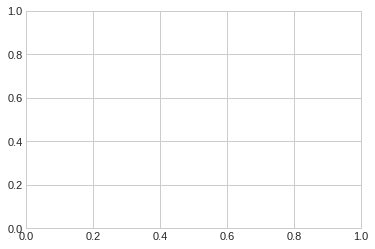

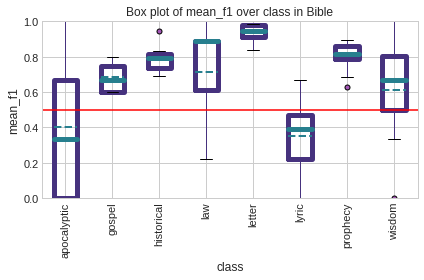

In [37]:
describe_data.boxplots(classification_results_bible_df.sort_values(by="mean_f1",ascending=False).groupby(["class","MFW","text_representation"]).head(10), "mean_f1", "class", wdir,"Bible", rotation=90, baseline=0.5)


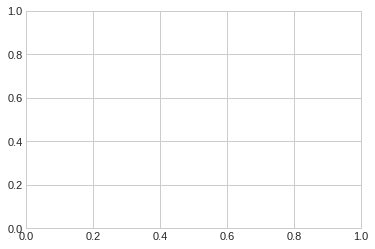

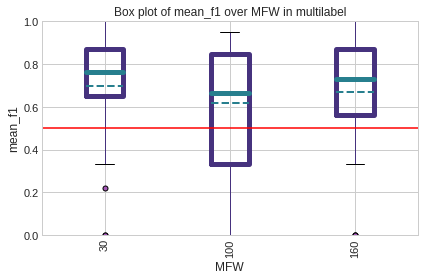

In [38]:
describe_data.boxplots(classification_results_bible_df.sort_values(by="mean_f1",ascending=False).groupby(["class","MFW","text_representation"]).head(10), "mean_f1", "MFW", wdir,"multilabel", rotation=90, baseline=0.5)


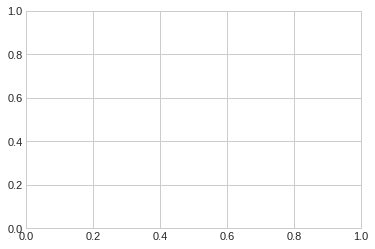

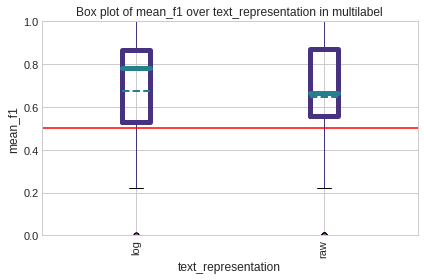

In [39]:
describe_data.boxplots(classification_results_bible_df.sort_values(by="mean_f1",ascending=False).groupby(["class","MFW","text_representation"]).head(10), "mean_f1", "text_representation", wdir,"multilabel", rotation=90, baseline=0.5)


In [40]:
results_classification_df = classification_results_bible_df.sort_values(by="mean_f1",ascending=False).groupby(["class","MFW","text_representation"]).head(1).groupby(["class"]).mean()



In [41]:
results_classification_df

,mean_f1,mean_rec,mean_prec,f1_macro,f1_micro,baseline,f1-baseline,MFW,typography,test_result_pvalue,sample_size,cv,sampling_times
class,,,,,,,,,,,,,
apocalyptic,0.694500,0.916667,0.583333,0.499833,0.625000,0.5,0.194500,96.666667,True,4.265826e-01,4.0,2.0,3.0
gospel,0.722333,0.833333,0.666667,0.644500,0.716667,0.5,0.222333,96.666667,True,1.888342e-01,10.0,5.0,3.0
historical,0.823833,0.850000,0.839000,0.807333,0.837500,0.5,0.323833,96.666667,True,4.250036e-03,26.0,10.0,3.0
law,0.870500,0.944500,0.833167,0.815000,0.860833,0.5,0.370500,96.666667,True,2.822036e-01,6.0,3.0,3.0
letter,0.957000,0.975000,0.955667,0.953000,0.955333,0.5,0.457000,96.666667,True,7.013088e-19,42.0,10.0,3.0
lyric,0.444333,0.555667,0.388833,0.425833,0.527667,0.5,-0.055667,96.666667,True,5.819831e-01,6.0,3.0,3.0
prophecy,0.848333,0.883333,0.838667,0.848333,0.870833,0.5,0.348333,96.666667,True,6.671590e-05,28.0,10.0,3.0
wisdom,0.703833,0.777833,0.666667,0.666667,0.722167,0.5,0.203833,96.666667,True,4.905158e-01,6.0,3.0,3.0


# Create Nodes 

In [42]:
amount_of_features_per_subgenre = 20
amount_of_texts_per_subgenre = 20
amount_of_features_per_text = 5

std_deviation_of_feature_in_subgenre = 0.5
std_deviation_of_feature_in_text = 4
#20 	5 	5 	0.5 	4.0

In [43]:
genres_nodes_df = pd.DataFrame(sorted(list(set(books_df["genre"]))) , index = sorted(list(set(books_df["genre"]))), columns=["label"])

In [44]:
genres_nodes_df["node"] = genres_nodes_df["label"]
genres_nodes_df["size"] = 14
genres_nodes_df["type"] = "subgenre"

In [45]:
genres_nodes_df

,label,node,size,type
apocalyptic,apocalyptic,apocalyptic,14,subgenre
gospel,gospel,gospel,14,subgenre
historical,historical,historical,14,subgenre
law,law,law,14,subgenre
letter,letter,letter,14,subgenre
lyric,lyric,lyric,14,subgenre
prophecy,prophecy,prophecy,14,subgenre
wisdom,wisdom,wisdom,14,subgenre


In [46]:
books_df

,bible,id,libro,testament,encoded,english,codebook,Chaptersc,genre,latitude,longitude,topical bible
codebook,,,,,,,,,,,,
GEN,bible,1,Génesis,old,1,Genesis,GEN,50.0,historical,32.6157,36.7931,Gen
EXO,bible,2,Éxodo,old,1,Exodus,EXO,40.0,historical,30.47,33.8433,Exod
LEV,bible,3,Levítico,old,1,Leviticus,LEV,27.0,law,30.5218,34.1126,Lev
NUM,bible,4,Números,old,1,Numbers,NUM,36.0,law,31.2216,34.8414,Num
DEU,bible,5,Deuteronomio,old,1,Deuteronomy,DEU,34.0,law,31.5061,35.7352,Deut
JOS,bible,6,Josué,old,1,Joshua,JOS,24.0,historical,31.7041,34.9904,Josh
JDG,bible,7,Jueces,old,1,Judges,JDG,21.0,historical,31.7296,35.4679,Judg
RUT,bible,8,Rut,old,1,Ruth,RUT,4.0,historical,29.8573,33.6189,Ruth
1SA,bible,9,1 Samuel,old,1,1 Samuel,1SA,31.0,historical,31.598,35.0462,1Sam


In [47]:
texts_nodes_df = books_df[["english","codebook"]]

In [48]:
texts_nodes_df.index = texts_nodes_df["codebook"]

In [49]:
texts_nodes_df = texts_nodes_df.rename(columns={"english":"label","codebook":"node"})

In [50]:
texts_nodes_df["size"] = 3
texts_nodes_df["type"] = "text"

In [51]:
texts_nodes_df

,label,node,size,type
codebook,,,,
GEN,Genesis,GEN,3,text
EXO,Exodus,EXO,3,text
LEV,Leviticus,LEV,3,text
NUM,Numbers,NUM,3,text
DEU,Deuteronomy,DEU,3,text
JOS,Joshua,JOS,3,text
JDG,Judges,JDG,3,text
RUT,Ruth,RUT,3,text
1SA,1 Samuel,1SA,3,text


In [52]:
features_nodes_df = pd.DataFrame(sorted(list(set(zscores_rel_features_books_df.columns.tolist()))), index = sorted(list(set(zscores_rel_features_books_df.columns.tolist()))), columns = ["label"])

In [53]:
features_nodes_df["type"] = "feature"
features_nodes_df["size"] = 2
features_nodes_df["node"] = features_nodes_df["label"]


In [54]:
features_nodes_df.head()

,label,type,size,node
100th perc of number of quotations,100th perc of number of quotations,feature,2,100th perc of number of quotations
100th perc of number of references,100th perc of number of references,feature,2,100th perc of number of references
1st perc of number of quotations,1st perc of number of quotations,feature,2,1st perc of number of quotations
1st perc of number of references,1st perc of number of references,feature,2,1st perc of number of references
groups,groups,feature,2,groups


In [55]:
nodes_df = pd.concat([genres_nodes_df[["node","size","type","label"]], texts_nodes_df[["node","size","type","label"]], features_nodes_df[["node","size","type","label"]] ], axis=0).fillna("")

In [56]:
nodes_df

,node,size,type,label
apocalyptic,apocalyptic,14,subgenre,apocalyptic
gospel,gospel,14,subgenre,gospel
historical,historical,14,subgenre,historical
law,law,14,subgenre,law
letter,letter,14,subgenre,letter
lyric,lyric,14,subgenre,lyric
prophecy,prophecy,14,subgenre,prophecy
wisdom,wisdom,14,subgenre,wisdom
GEN,GEN,3,text,Genesis
EXO,EXO,3,text,Exodus


In [57]:
nodes_df.shape

(234, 4)

# Create Edges

In [58]:

zscores_rel_features_books_df



,number of entities referred,people,number of entities receiving communication,number verses,number of references,number of quotations,number of entities communicating,groups,number of oral quotations,number of 1st level quotations,...,most frequent entity id people_#per504,most frequent entity id people_#per843,most frequent entity id people_#per861,most frequent entity id people_#per93,most frequent entity id people_#per969,most frequent entity id groups_#org100,most frequent entity id groups_#org101,most frequent entity id groups_#org12,most frequent entity id groups_#org122,1st perc of number of references
1CO,-0.303435,-0.277165,-0.642070,-0.009785,-0.009785,-0.009785,-0.651778,-0.031970,-0.679790,-0.643289,...,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,7.875,0.0
1JO,-0.656798,-0.545792,-0.667658,-0.671920,-0.671920,-0.671920,-0.673785,-0.634761,-0.682124,-0.708125,...,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,0.0
1KI,1.520667,1.842879,0.149675,0.746086,0.746086,0.746086,0.164148,0.560208,0.232723,0.326649,...,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,0.0
1PE,-0.703039,-0.619533,-0.663143,-0.671920,-0.671920,-0.671920,-0.668706,-0.647496,-0.679790,-0.695157,...,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,0.0
1SA,1.591064,2.010112,0.242999,0.734120,0.734120,0.734120,0.323271,0.965606,0.554786,0.668980,...,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,0.0
1TH,-0.711321,-0.608998,-0.670669,-0.703830,-0.703830,-0.703830,-0.677170,-0.694191,-0.689125,-0.713311,...,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,0.0
1TI,-0.694067,-0.639285,-0.670669,-0.655965,-0.655965,-0.655965,-0.677170,-0.573208,-0.689125,-0.708125,...,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,0.0
2CO,-0.580190,-0.456250,-0.663143,-0.368774,-0.368774,-0.368774,-0.670399,-0.568963,-0.677456,-0.695157,...,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,0.0
2JO,-0.815536,-0.740678,-0.669164,-0.855403,-0.855403,-0.855403,-0.675477,-0.772723,-0.684457,-0.710718,...,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,0.0
2KI,1.727716,1.903451,0.178274,0.550637,0.550637,0.550637,0.213239,0.757601,0.314406,0.241066,...,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,0.0


In [59]:
subgenre_features_edges_df = genre_as_graph.make_subgenre_features_edges(results_features_df,  amount_of_features_per_subgenre, std_deviation_of_feature_in_subgenre, semantic_subgenres_lt = genres_lt)

In [60]:
subgenre_features_edges_df

,source,target,weight,type
0,apocalyptic,most frequent entity id groups_#org4,3.875000,subgenre-feature
1,apocalyptic,most frequent entity id works_#wor4,2.672949,subgenre-feature
2,apocalyptic,number of soCalled quotations,1.489403,subgenre-feature
3,apocalyptic,second most common entity id_#per1,1.241749,subgenre-feature
4,apocalyptic,second most common entity id_#org70,1.241749,subgenre-feature
5,apocalyptic,number chapters,1.192340,subgenre-feature
6,apocalyptic,number pericopes,1.136937,subgenre-feature
7,apocalyptic,most frequent entity id places_#pla41,1.125000,subgenre-feature
8,apocalyptic,most frequent entity id times_#tim9,1.125000,subgenre-feature
9,apocalyptic,most frequenct entity frequencygroups,1.034493,subgenre-feature


In [61]:
books_genre_boolean_df

,apocalyptic,gospel,historical,law,letter,lyric,prophecy,wisdom
codebook,,,,,,,,
1CO,0,0,0,0,1,0,0,0
1JO,0,0,0,0,1,0,0,0
1KI,0,0,1,0,0,0,0,0
1PE,0,0,0,0,1,0,0,0
1SA,0,0,1,0,0,0,0,0
1TH,0,0,0,0,1,0,0,0
1TI,0,0,0,0,1,0,0,0
2CO,0,0,0,0,1,0,0,0
2JO,0,0,0,0,1,0,0,0


In [62]:
def make_subgenres_novels_edges(new_metadata_df, semantic_subgenres_lt, amount_of_texts_per_subgenre):

    rel_labels_df = new_metadata_df[semantic_subgenres_lt]
    
    edges_subgenres_novels_lt = []
    
    for subgenre in semantic_subgenres_lt:
        for index, row in rel_labels_df.loc[rel_labels_df[subgenre]> 0].iloc[0:amount_of_texts_per_subgenre,:].iterrows():
            edges_subgenres_novels_lt.append([subgenre, index, row[subgenre], "subgenre-novel"])
    
    subgenres_novels_edges_df = pd.DataFrame(edges_subgenres_novels_lt, columns=["source","target","weight","type"])
    return subgenres_novels_edges_df

In [63]:

subgenres_novels_edges_df = make_subgenres_novels_edges(books_genre_boolean_df, genres_lt, amount_of_texts_per_subgenre)


In [64]:
subgenres_novels_edges_df

,source,target,weight,type
0,apocalyptic,ISA,1,subgenre-novel
1,apocalyptic,REV,1,subgenre-novel
2,gospel,ACT,1,subgenre-novel
3,gospel,JOH,1,subgenre-novel
4,gospel,LUK,1,subgenre-novel
5,gospel,MAR,1,subgenre-novel
6,gospel,MAT,1,subgenre-novel
7,historical,1KI,1,subgenre-novel
8,historical,1SA,1,subgenre-novel
9,historical,2KI,1,subgenre-novel


In [65]:
text_features_edges_df = genre_as_graph.make_text_features_edges(zscores_rel_features_books_df, subgenres_novels_edges_df, [], std_deviation_of_feature_in_text, amount_of_features_per_text, subgenre_features_edges_df, subgenre_features_edges_df, [])


In [66]:
text_features_edges_df

,source,target,weight,type
0,people,GEN,4.448821,feature-novel
1,number verses,PSA,4.028840,feature-novel
2,number of references,PSA,4.028840,feature-novel
3,number of quotations,PSA,4.028840,feature-novel
4,number of 1st level quotations,PSA,4.004115,feature-novel
5,most common entity frecuency,PSA,4.342645,feature-novel
6,most frequenct entity frequencypeople,PSA,4.437807,feature-novel
7,most frequenct entity frequencygroups,NUM,4.019051,feature-novel
8,number of 2nd level quotations,EZE,4.500017,feature-novel
9,number of 2nd level quotations,JER,4.467964,feature-novel


In [67]:
edges_df = pd.concat([subgenre_features_edges_df, subgenres_novels_edges_df, text_features_edges_df]).fillna("")

edges_df.shape

(265, 4)

# Create Graph

In [68]:
nodes_df = genre_as_graph.filter_nodes(nodes_df, edges_df, [], [])

(234, 4)
(162, 4)


In [69]:
nodes_df

,node,size,type,label
apocalyptic,apocalyptic,14,subgenre,apocalyptic
gospel,gospel,14,subgenre,gospel
historical,historical,14,subgenre,historical
law,law,14,subgenre,law
letter,letter,14,subgenre,letter
lyric,lyric,14,subgenre,lyric
prophecy,prophecy,14,subgenre,prophecy
wisdom,wisdom,14,subgenre,wisdom
GEN,GEN,3,text,Genesis
EXO,EXO,3,text,Exodus


In [70]:
graph_gp = genre_as_graph.make_graph(nodes_df, edges_df)

In [71]:
for key,value in dict(graph_gp.nodes.data('bipartite')).items():
    print(key)

GEN
EXO
LEV
NUM
DEU
JOS
JDG
RUT
1SA
2SA
1KI
2KI
EZR
NEH
EST
JOB
PSA
PRO
ECC
SON
ISA
JER
LAM
EZE
DAN
HOS
JOE
AMO
OBA
JON
MIC
NAH
HAB
ZEP
HAG
ZEC
MAL
MAT
MAR
LUK
JOH
ACT
ROM
1CO
2CO
GAL
EPH
PHI
COL
1TH
2TH
1TI
2TI
PHM
HEB
JAM
1PE
2PE
1JO
2JO
3JO
JUD
REV
100th perc of number of quotations
100th perc of number of references
groups
mean number quotations
mean number references
median number quotations
median number references
most common entity frecuency
most common entity id_#org0
most common entity id_#org19
most common entity id_#org70
most common entity id_#per1
most common entity id_#per14
most common entity id_#per1876
most common entity id_#per504
most frequenct entity frequencygroups
most frequenct entity frequencypeople
most frequenct entity frequencyplaces
most frequenct entity frequencytimes
most frequenct entity frequencyworks
most frequent entity id groups_#org0
most frequent entity id groups_#org12
most frequent entity id groups_#org13
most frequent entity id groups_#org18
mos

In [72]:
colors_list, sizes_list, weights_list, labels_list = genre_as_graph.make_attributes(graph_gp)

In [73]:
wdir = "/home/jose/Dropbox/Doktorarbeit/publications/202006_DH/data/bible/"

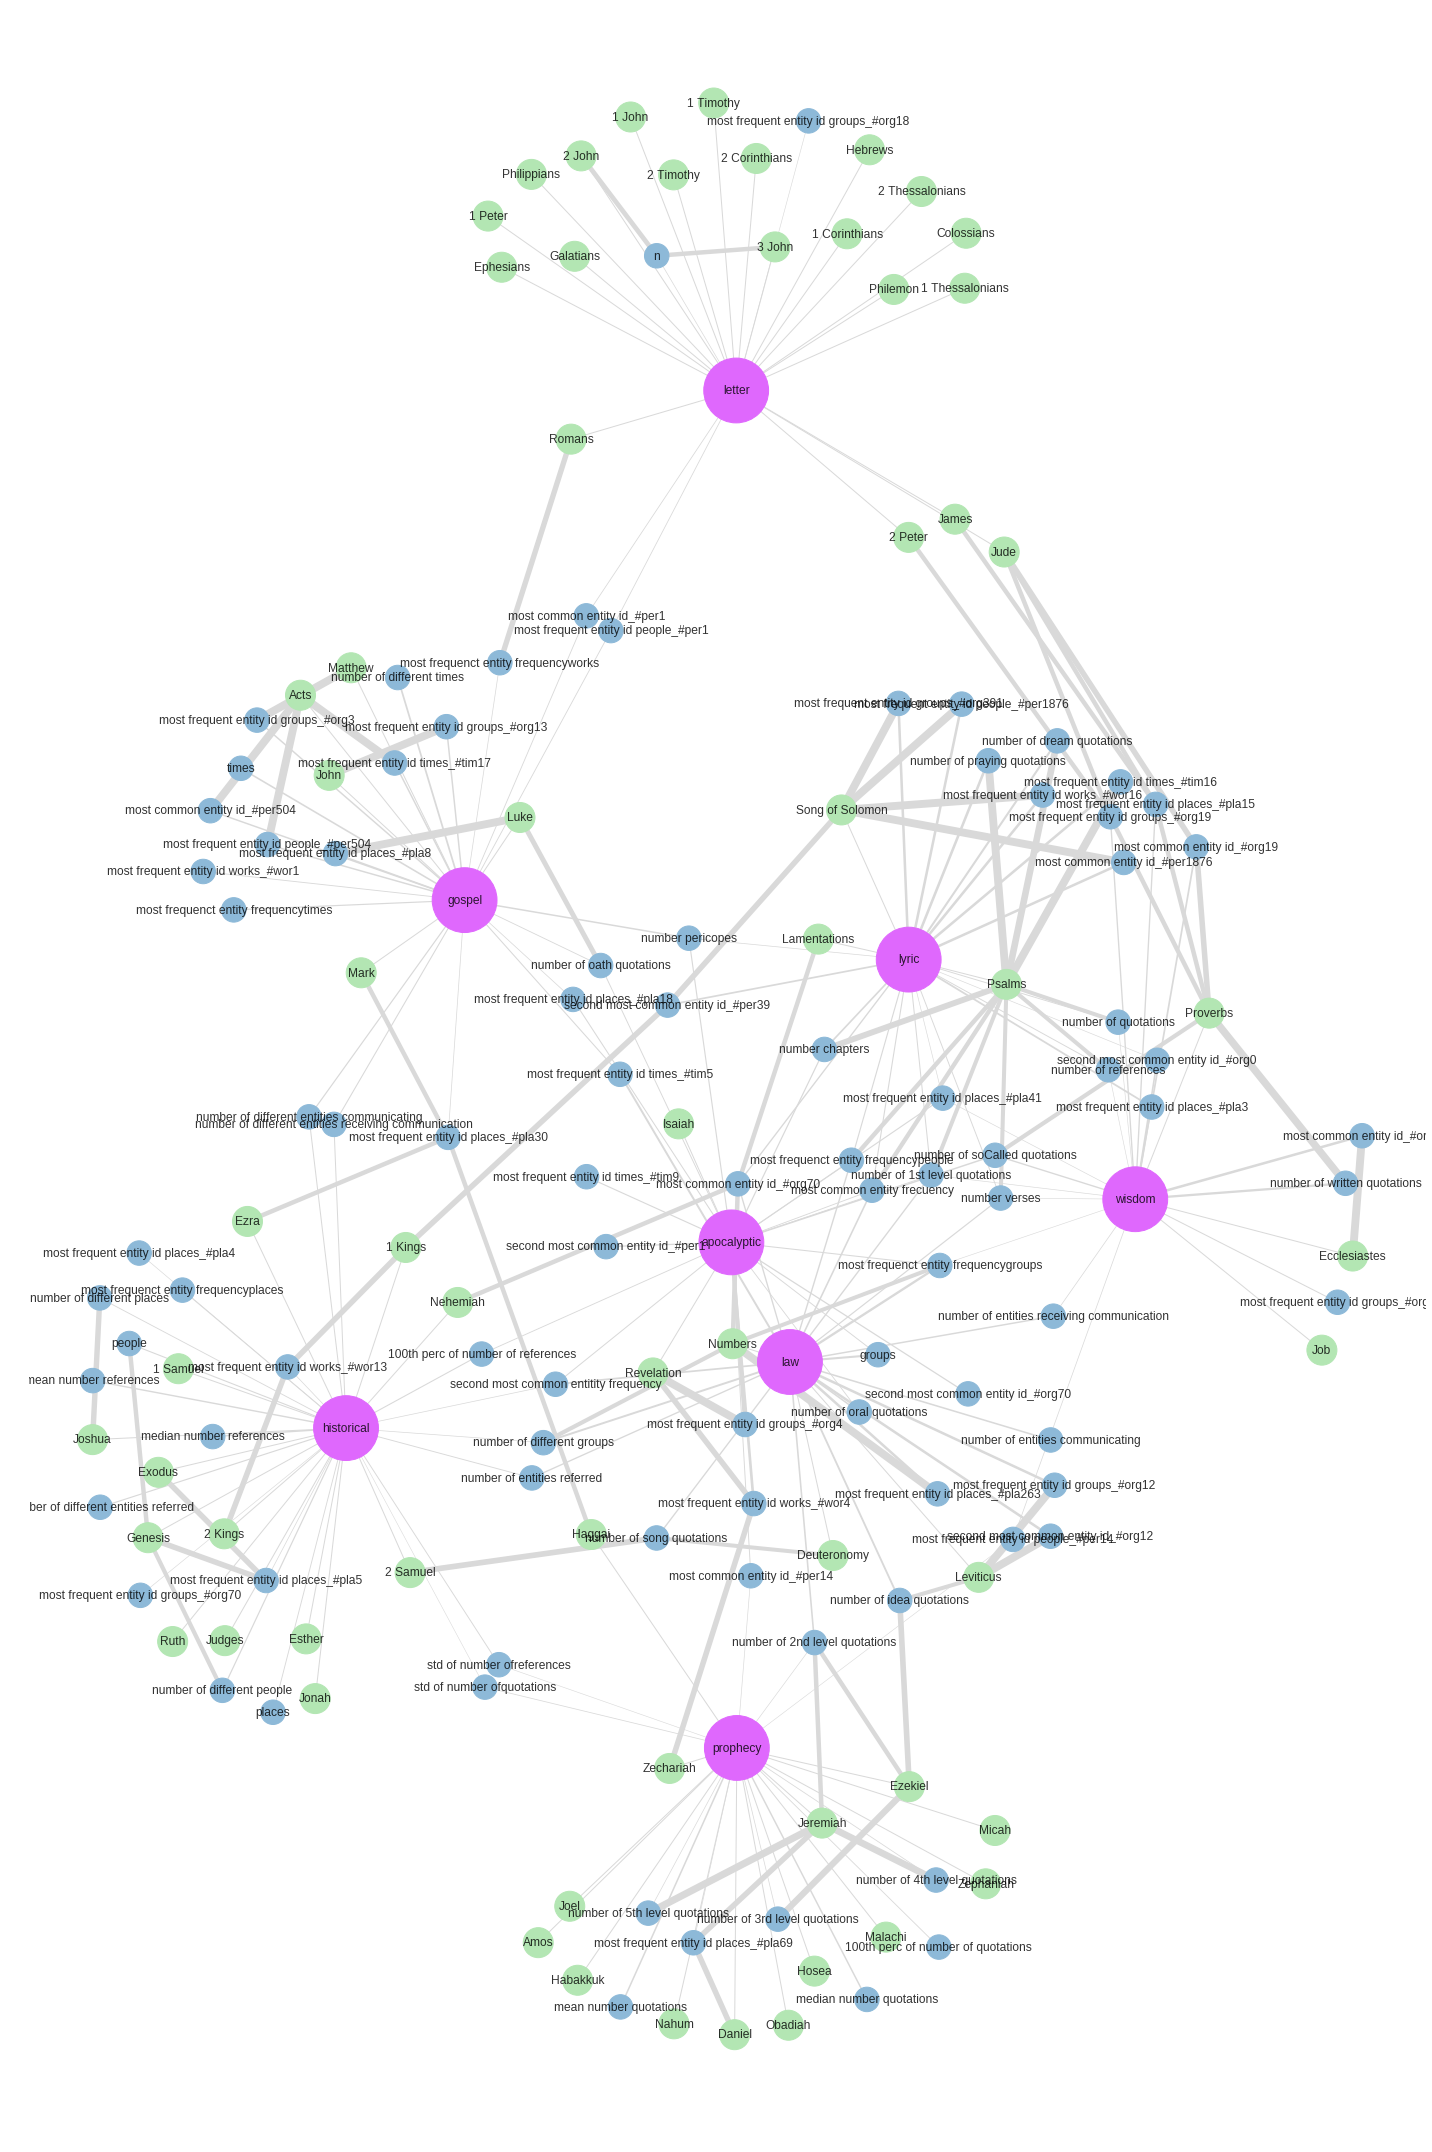

In [74]:
genre_as_graph.plot_graph(graph_gp, labels_list, weights_list, colors_list, sizes_list, wdir, savefig = True)

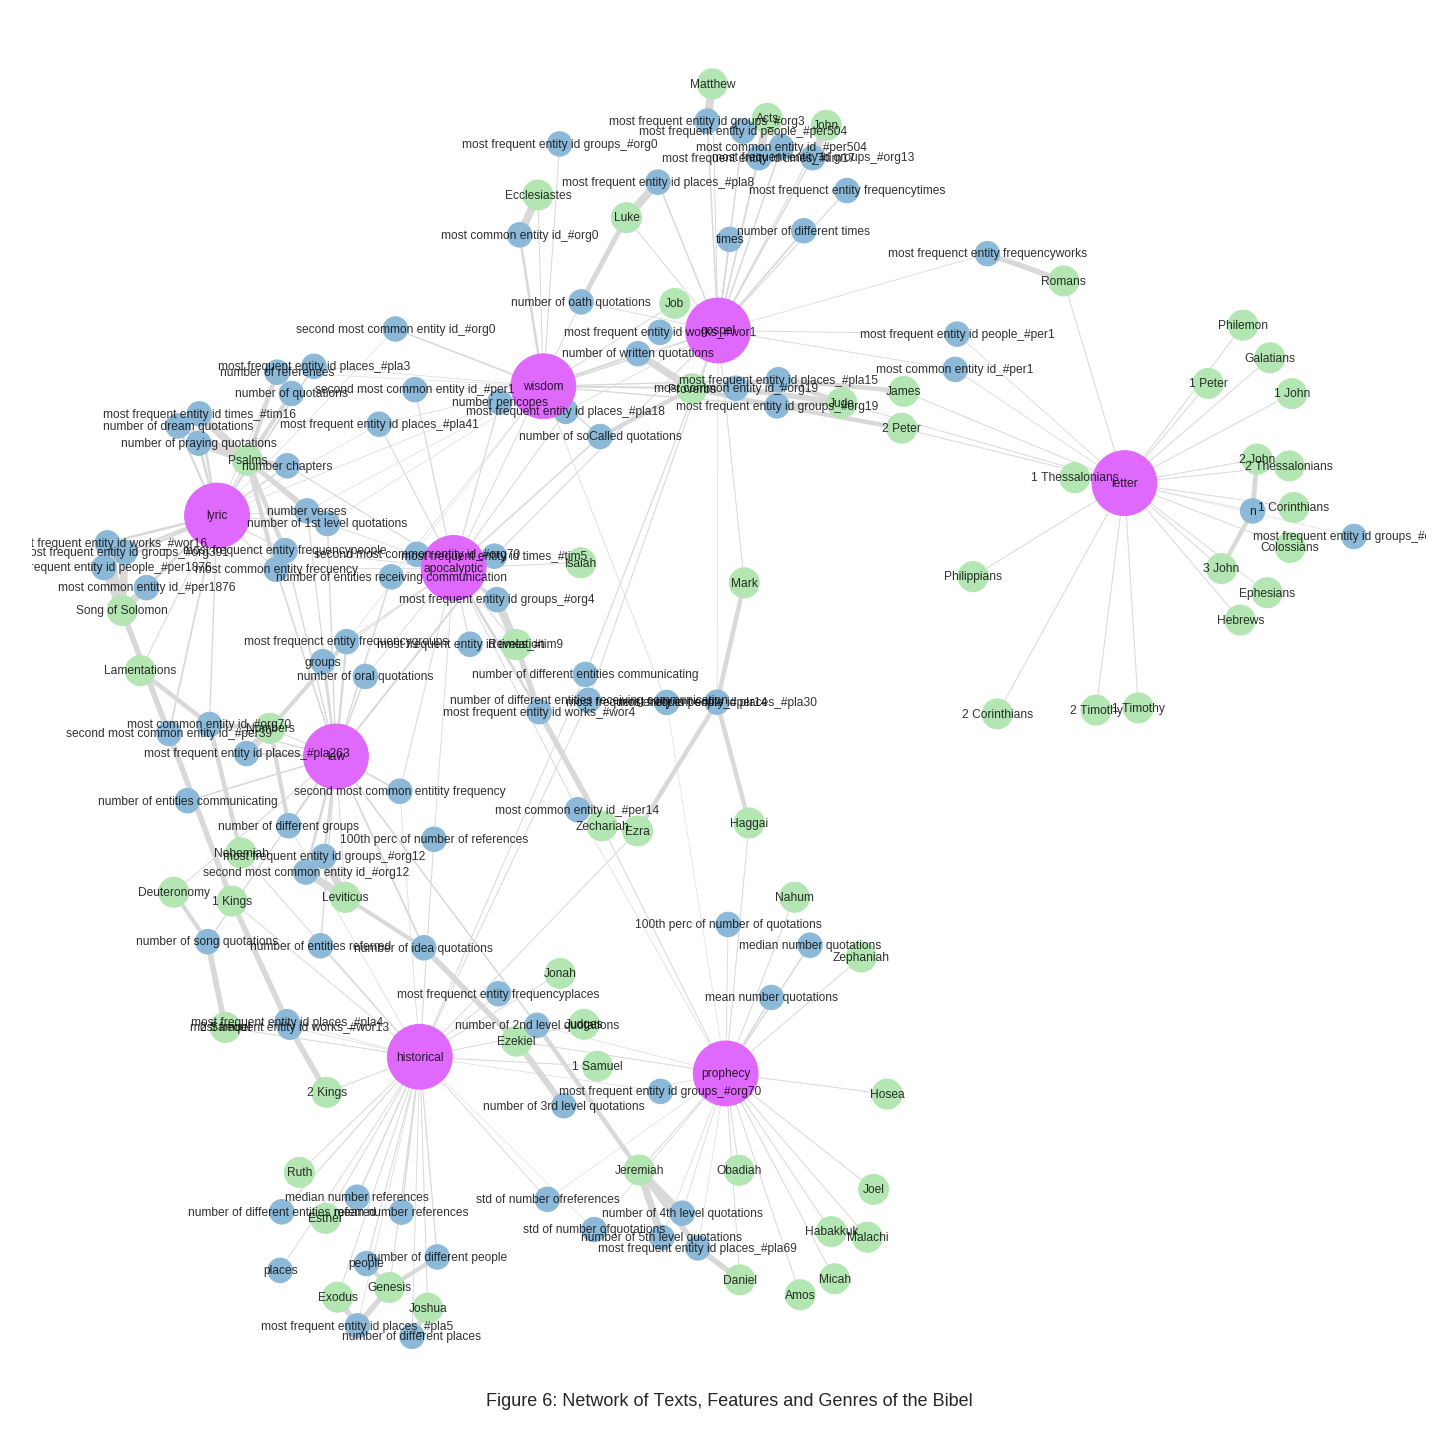

In [95]:
genre_as_graph.plot_graph(graph_gp, labels_list, weights_list, colors_list, sizes_list, wdir, savefig = True, pos_str = "spring", k = 10, iterations = 3000, figsize=(20,20), title = "Figure 6: Network of Texts, Features and Genres of the Bibel")


# Analyzing Graph

In [76]:
import networkx as nx

In [77]:
eigenvector_list = nx.eigenvector_centrality_numpy(graph_gp)

In [78]:
nodes_df

,node,size,type,label
apocalyptic,apocalyptic,14,subgenre,apocalyptic
gospel,gospel,14,subgenre,gospel
historical,historical,14,subgenre,historical
law,law,14,subgenre,law
letter,letter,14,subgenre,letter
lyric,lyric,14,subgenre,lyric
prophecy,prophecy,14,subgenre,prophecy
wisdom,wisdom,14,subgenre,wisdom
GEN,GEN,3,text,Genesis
EXO,EXO,3,text,Exodus


In [79]:
genres_nodes_results_df = genres_nodes_df.copy()

In [80]:
genres_nodes_results_df["eigenvector"] = 0
for genre in genres_lt:
    if genre in genres_nodes_results_df.index.tolist():
        genres_nodes_results_df.loc[genre,"eigenvector"] = eigenvector_list[genre]

In [81]:
genres_nodes_results_df.sort_values(by="eigenvector")

,label,node,size,type,eigenvector
letter,letter,letter,14,subgenre,0.018449
prophecy,prophecy,prophecy,14,subgenre,0.071351
gospel,gospel,gospel,14,subgenre,0.094120
historical,historical,historical,14,subgenre,0.163343
wisdom,wisdom,wisdom,14,subgenre,0.243250
apocalyptic,apocalyptic,apocalyptic,14,subgenre,0.279349
law,law,law,14,subgenre,0.308195
lyric,lyric,lyric,14,subgenre,0.390827


In [82]:
#results_classification_df = pd.read_csv("/home/jose/Dropbox/Doktorarbeit/publications/202006_DH/data/bible/1_results_classification_csv",sep="\t",index_col=0)

In [83]:
results_classification_df

,mean_f1,mean_rec,mean_prec,f1_macro,f1_micro,baseline,f1-baseline,MFW,typography,test_result_pvalue,sample_size,cv,sampling_times
class,,,,,,,,,,,,,
apocalyptic,0.694500,0.916667,0.583333,0.499833,0.625000,0.5,0.194500,96.666667,True,4.265826e-01,4.0,2.0,3.0
gospel,0.722333,0.833333,0.666667,0.644500,0.716667,0.5,0.222333,96.666667,True,1.888342e-01,10.0,5.0,3.0
historical,0.823833,0.850000,0.839000,0.807333,0.837500,0.5,0.323833,96.666667,True,4.250036e-03,26.0,10.0,3.0
law,0.870500,0.944500,0.833167,0.815000,0.860833,0.5,0.370500,96.666667,True,2.822036e-01,6.0,3.0,3.0
letter,0.957000,0.975000,0.955667,0.953000,0.955333,0.5,0.457000,96.666667,True,7.013088e-19,42.0,10.0,3.0
lyric,0.444333,0.555667,0.388833,0.425833,0.527667,0.5,-0.055667,96.666667,True,5.819831e-01,6.0,3.0,3.0
prophecy,0.848333,0.883333,0.838667,0.848333,0.870833,0.5,0.348333,96.666667,True,6.671590e-05,28.0,10.0,3.0
wisdom,0.703833,0.777833,0.666667,0.666667,0.722167,0.5,0.203833,96.666667,True,4.905158e-01,6.0,3.0,3.0


In [84]:
results_classification_df

,mean_f1,mean_rec,mean_prec,f1_macro,f1_micro,baseline,f1-baseline,MFW,typography,test_result_pvalue,sample_size,cv,sampling_times
class,,,,,,,,,,,,,
apocalyptic,0.694500,0.916667,0.583333,0.499833,0.625000,0.5,0.194500,96.666667,True,4.265826e-01,4.0,2.0,3.0
gospel,0.722333,0.833333,0.666667,0.644500,0.716667,0.5,0.222333,96.666667,True,1.888342e-01,10.0,5.0,3.0
historical,0.823833,0.850000,0.839000,0.807333,0.837500,0.5,0.323833,96.666667,True,4.250036e-03,26.0,10.0,3.0
law,0.870500,0.944500,0.833167,0.815000,0.860833,0.5,0.370500,96.666667,True,2.822036e-01,6.0,3.0,3.0
letter,0.957000,0.975000,0.955667,0.953000,0.955333,0.5,0.457000,96.666667,True,7.013088e-19,42.0,10.0,3.0
lyric,0.444333,0.555667,0.388833,0.425833,0.527667,0.5,-0.055667,96.666667,True,5.819831e-01,6.0,3.0,3.0
prophecy,0.848333,0.883333,0.838667,0.848333,0.870833,0.5,0.348333,96.666667,True,6.671590e-05,28.0,10.0,3.0
wisdom,0.703833,0.777833,0.666667,0.666667,0.722167,0.5,0.203833,96.666667,True,4.905158e-01,6.0,3.0,3.0


In [85]:
genres_nodes_results_df = pd.merge(genres_nodes_results_df, results_classification_df, left_index=True, right_index=True)

In [86]:
genres_nodes_results_df

,label,node,size,type,eigenvector,mean_f1,mean_rec,mean_prec,f1_macro,f1_micro,baseline,f1-baseline,MFW,typography,test_result_pvalue,sample_size,cv,sampling_times
apocalyptic,apocalyptic,apocalyptic,14,subgenre,0.279349,0.694500,0.916667,0.583333,0.499833,0.625000,0.5,0.194500,96.666667,True,4.265826e-01,4.0,2.0,3.0
gospel,gospel,gospel,14,subgenre,0.094120,0.722333,0.833333,0.666667,0.644500,0.716667,0.5,0.222333,96.666667,True,1.888342e-01,10.0,5.0,3.0
historical,historical,historical,14,subgenre,0.163343,0.823833,0.850000,0.839000,0.807333,0.837500,0.5,0.323833,96.666667,True,4.250036e-03,26.0,10.0,3.0
law,law,law,14,subgenre,0.308195,0.870500,0.944500,0.833167,0.815000,0.860833,0.5,0.370500,96.666667,True,2.822036e-01,6.0,3.0,3.0
letter,letter,letter,14,subgenre,0.018449,0.957000,0.975000,0.955667,0.953000,0.955333,0.5,0.457000,96.666667,True,7.013088e-19,42.0,10.0,3.0
lyric,lyric,lyric,14,subgenre,0.390827,0.444333,0.555667,0.388833,0.425833,0.527667,0.5,-0.055667,96.666667,True,5.819831e-01,6.0,3.0,3.0
prophecy,prophecy,prophecy,14,subgenre,0.071351,0.848333,0.883333,0.838667,0.848333,0.870833,0.5,0.348333,96.666667,True,6.671590e-05,28.0,10.0,3.0
wisdom,wisdom,wisdom,14,subgenre,0.243250,0.703833,0.777833,0.666667,0.666667,0.722167,0.5,0.203833,96.666667,True,4.905158e-01,6.0,3.0,3.0


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


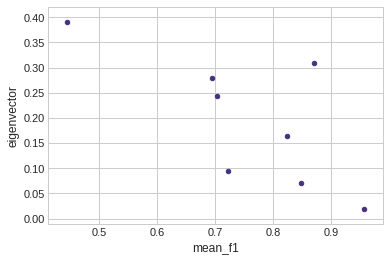

In [87]:
genres_nodes_results_df.plot.scatter("mean_f1", "eigenvector")

In [88]:
import scipy.stats as stats

In [89]:
stats.pearsonr(
genres_nodes_results_df["mean_f1"],
genres_nodes_results_df["eigenvector"]
)

(-0.7126992251668447, 0.047245159802858136)

In [90]:
amounts_of_features_per_subgenre = [amount_of_features_per_subgenre]
amounts_of_texts_per_subgenre = [amount_of_texts_per_subgenre]
amounts_of_features_per_text = [amount_of_features_per_text]

stds_deviation_of_feature_in_subgenre = [0]
stds_deviation_of_feature_in_text = [1.5]


std_deviation_of_feature_in_subgenre = 0
std_deviation_of_feature_in_text = 1.5

results_distance_nodes_lt = []

#all_pairs_dct = dict(nx.all_pairs_dijkstra_path_length(graph_gp))

for subgenre_st1 in genres_nodes_results_df.sort_values(by="eigenvector", ascending=False).index.tolist():
    for subgenre_st2 in genres_nodes_results_df.sort_values(by="eigenvector", ascending=False).index.tolist():
        if subgenre_st1 != subgenre_st2:
            common_neighbors = len(list(nx.common_neighbors(graph_gp, subgenre_st1, subgenre_st2)))
            results_distance_nodes_lt.append([subgenre_st1, subgenre_st2, common_neighbors/(amounts_of_features_per_subgenre[0] + amounts_of_features_per_text[0])])
results_distance_nodes_df = pd.DataFrame(results_distance_nodes_lt, columns=["source","target","prop_common_neighbors"]).sort_values(by="prop_common_neighbors",ascending=False)
results_distance_nodes_df


,source,target,prop_common_neighbors
21,wisdom,lyric,0.28
2,lyric,wisdom,0.28
15,apocalyptic,law,0.28
8,law,apocalyptic,0.28
1,lyric,apocalyptic,0.24
14,apocalyptic,lyric,0.24
7,law,lyric,0.20
0,lyric,law,0.20
22,wisdom,law,0.16
16,apocalyptic,wisdom,0.16


In [91]:
comp = nx.algorithms.community.centrality.girvan_newman(graph_gp)
comp_lt = list(sorted(c) for c in next(comp))

In [92]:
comp_lt

[['100th perc of number of quotations',
  '100th perc of number of references',
  '1KI',
  '1SA',
  '2KI',
  '2SA',
  'ACT',
  'AMO',
  'DAN',
  'DEU',
  'ECC',
  'EST',
  'EXO',
  'EZE',
  'EZR',
  'GEN',
  'HAB',
  'HAG',
  'HOS',
  'ISA',
  'JDG',
  'JER',
  'JOB',
  'JOE',
  'JOH',
  'JON',
  'JOS',
  'JUD',
  'LAM',
  'LEV',
  'LUK',
  'MAL',
  'MAR',
  'MAT',
  'MIC',
  'NAH',
  'NEH',
  'NUM',
  'OBA',
  'PRO',
  'PSA',
  'REV',
  'RUT',
  'SON',
  'ZEC',
  'ZEP',
  'apocalyptic',
  'gospel',
  'groups',
  'historical',
  'law',
  'lyric',
  'mean number quotations',
  'mean number references',
  'median number quotations',
  'median number references',
  'most common entity frecuency',
  'most common entity id_#org0',
  'most common entity id_#org19',
  'most common entity id_#org70',
  'most common entity id_#per14',
  'most common entity id_#per1876',
  'most common entity id_#per504',
  'most frequenct entity frequencygroups',
  'most frequenct entity frequencypeople',
  'mo

In [93]:
comp = nx.algorithms.community.centrality.girvan_newman(graph_gp)
comp_lt = list(sorted(c) for c in next(comp))
print(len(comp_lt))
i = 0
for community in comp_lt:
    print(i, community[0:3], len(community))
    for item in community:
        if item in genres_lt:
            print(item)
    i += 1
    

2
0 ['100th perc of number of quotations', '100th perc of number of references', '1KI'] 136
apocalyptic
gospel
historical
law
lyric
prophecy
wisdom
1 ['1CO', '1JO', '1PE'] 26
letter


In [94]:
comp_lt[1]

['1CO',
 '1JO',
 '1PE',
 '1TH',
 '1TI',
 '2CO',
 '2JO',
 '2PE',
 '2TH',
 '2TI',
 '3JO',
 'COL',
 'EPH',
 'GAL',
 'HEB',
 'JAM',
 'PHI',
 'PHM',
 'ROM',
 'letter',
 'most common entity id_#per1',
 'most frequenct entity frequencyworks',
 'most frequent entity id groups_#org18',
 'most frequent entity id groups_#org19',
 'most frequent entity id people_#per1',
 'n']